In [1]:
import numpy as np
import pandas as pd
import seaborn

In [2]:
t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
print(t.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [3]:
import pandas as pd



#  number of passengers
num = t.shape[0]
print(" number of passengers:", num)


 number of passengers: 891


In [6]:
distinct_values = t['who'].nunique()
print("Number of distinct values ", distinct_values)


Number of distinct values  3


In [7]:
missing_values = t.isna().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [8]:
pass_over_60 = t[t['age'] > 60]
num_pass= pass_over_60.shape[0]
print("Number of passengers over 60 years old:", num_pass)


Number of passengers over 60 years old: 22


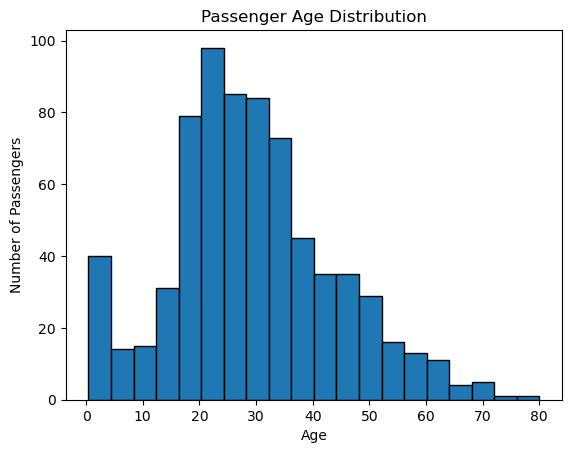

In [9]:
import matplotlib.pyplot as plt

plt.hist(t['age'].dropna(), bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Passenger Age Distribution')
plt.show()


In [10]:
quantiles = t['age'].quantile([0.25, 0.50, 0.75])
print("3-Quantiles of Passenger Age Distribution:")
print(quantiles)


3-Quantiles of Passenger Age Distribution:
0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64


In [11]:
# Dropping passengers with missing 'embarked' data
t.dropna(subset=['embarked'], inplace=True)


In [12]:

avg=['fare'].mean()


min = t['fare'].min()



max= t['fare'].max()

print("Average Fare:", avg)


print("Minimum Fare:", min)


print("Maximum Fare:", max)


Average Fare: 32.09668087739029
Minimum Fare: 0.0
Maximum Fare: 512.3292


In [13]:
# Calculating proportions of passengers in different classes
class_proportions = t['class'].value_counts(normalize=True)

print("Proportions of Passengers in Different Classes:")
print(class_proportions)


Proportions of Passengers in Different Classes:
Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64


In [13]:
# Calculating female to male ratio in each travel class
ratio = t.groupby(['class', 'sex']).size().unstack(fill_value=0)
print(ratio)
ratio['female_to_male_ratio'] = ratio['female'] / ratio['male']

print("Female to Male Ratio in Each Travel Class:")
print(ratio[['female_to_male_ratio']])


sex     female  male
class               
First       94   122
Second      76   108
Third      144   347
Female to Male Ratio in Each Travel Class:
sex     female_to_male_ratio
class                       
First               0.770492
Second              0.703704
Third               0.414986


In [15]:
# fraction of passengers who survived
survival_fraction = (t['survived'] == 1).mean()

print("Fraction of Passengers Who Survived:", survival_fraction)


Fraction of Passengers Who Survived: 0.38245219347581555


In [14]:
# survival rates for male and female passengers
survival_rates = t.groupby('sex')['survived'].mean()
print(survival_rates)

print("Survival Rates by Gender:")
print(survival_rates)


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
Survival Rates by Gender:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [17]:
# survival rates for passengers in different classes
survival_rates_by_class = t.groupby('class')['survived'].mean()

print("Survival Rates by Class:")
print(survival_rates_by_class)


Survival Rates by Class:
class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


In [18]:
#  pivot table for survival rates by class and gender
survival_table = t.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')

print("Survival Rate Dependencies on Class and Gender:")
print(survival_table)


Survival Rate Dependencies on Class and Gender:
sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


In [15]:
# pivot table for number of survivors and average fare by gender and class
table = t.pivot_table(index=['sex', 'class'], values=['survived', 'fare'], aggfunc={'survived': 'sum', 'fare': 'mean'})

print(" Number of Survivors and Average Fare by Gender and Class:")
print(table)



 Number of Survivors and Average Fare by Gender and Class:
                     fare  survived
sex    class                       
female First   106.125798        91
       Second   21.970121        70
       Third    16.118810        72
male   First    67.226127        45
       Second   19.741782        17
       Third    12.661633        47
